In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv("intern_performance_dataset.csv")
df
# df shape
print(df.shape)
df.head()

(200, 7)


,InternID,AttendanceRate,TasksCompleted,AvgSubmissionDelay,FeedbackScore,EngagementScore,PerformanceFlag
0,1,88,76,0,4,20,1
1,2,78,72,4,2,70,0
2,3,64,90,5,1,64,0
3,4,92,81,2,5,96,1
4,5,57,83,8,4,23,0


In [10]:
# Step 2 — Data Cleaning & Exploration

In [11]:
# CHECK NULL VALUES
df.isnull().sum()

InternID              0
AttendanceRate        0
TasksCompleted        0
AvgSubmissionDelay    0
FeedbackScore         0
EngagementScore       0
PerformanceFlag       0
dtype: int64

In [14]:
# Basic descriptive statistics
df.describe()

,InternID,AttendanceRate,TasksCompleted,AvgSubmissionDelay,FeedbackScore,EngagementScore,PerformanceFlag
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,74.635000,70.97000,4.785000,3.105000,59.210000,0.415000
std,57.879185,14.656598,17.81251,3.160493,1.515075,24.073921,0.493958
min,1.000000,50.000000,40.00000,0.000000,1.000000,20.000000,0.000000
25%,50.750000,62.000000,57.00000,2.000000,2.000000,38.000000,0.000000
50%,100.500000,75.000000,72.00000,5.000000,3.000000,59.500000,0.000000
75%,150.250000,88.000000,87.00000,8.000000,5.000000,80.250000,1.000000
max,200.000000,100.000000,100.00000,10.000000,5.000000,100.000000,1.000000


In [ ]:
Summary of Internship Program Analysis:

Intern ID & Attendance:

Total Interns: 200

Attendance Rate: Average 75%, with a standard deviation of 14.6%.

Attendance ranges from 50% to 100%, indicating a normal distribution.

Task Completion:

Average Task Completion Rate: Approximately 70%, with a range from 40% to 100%.

This suggests that most students are completing tasks at a decent rate.

Submission Delays:

Average Submission Delay: Around 5 days, with some students submitting on time and others taking up to 10 days.

Feedback Scores:

Average Feedback Score: Mostly around 3, with a standard deviation of 1.5.

Feedback is moderate, with scores ranging from 1 to 5.

Engagement Scores:

Average Engagement: 60%, with a standard deviation of 24.

Engagement is moderate, not particularly high or low.

In [20]:
# Check target distribution
dist = df['PerformanceFlag'].value_counts(normalize=True)
print(dist)
"83(0.41) intern successful the task and 117(0.58) intern does not succesful the task."

PerformanceFlag
0    0.585
1    0.415
Name: proportion, dtype: float64


'83 intern successful the task and 117 intern does not succesful the task.'

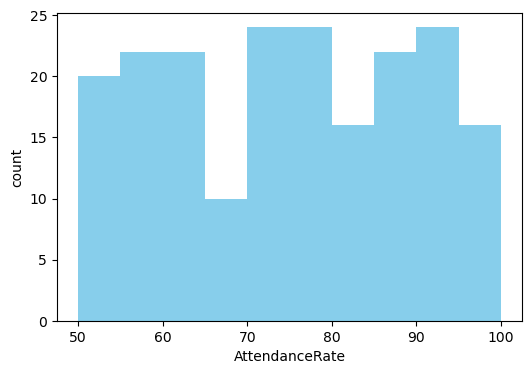

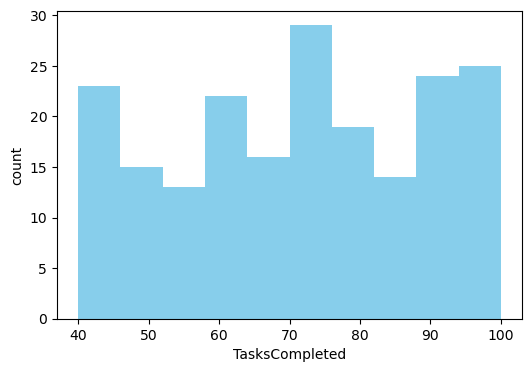

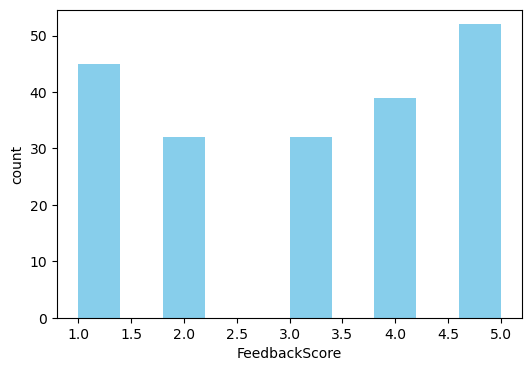

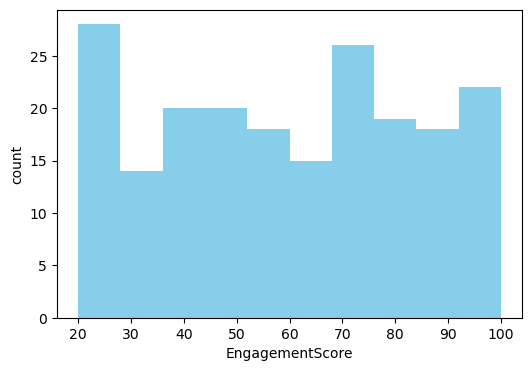

'Attendance, Task Completion, Feedback, and Mentor Engagement all have fairly even spreads and no extreme skew.\n\nSome features have small peaks or clusters, but overall they follow a roughly normal/random distribution.'

In [23]:
# Question 1: What is the distribution of each numeric feature?

""" We want to see how interns are distributed in:
'AttendanceRate', 'TasksCompleted', 'FeedbackScore', 'EngagementScore'
"""
numeric_cols = ['AttendanceRate', 'TasksCompleted', 'FeedbackScore', 'EngagementScore']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col],bins=10,color="skyblue");
    plt.xlabel(f"{col}")
    plt.ylabel("count")
    plt.show()

"""Attendance, Task Completion, Feedback, and Mentor Engagement all have fairly even spreads and no extreme skew.

Some features have small peaks or clusters, but overall they follow a roughly normal/random distribution."""

In [ ]:
Attendance, Task Completion, Feedback, and Mentor Engagement all have fairly even spreads and no extreme skew.

Some features have small peaks or clusters, but overall they follow a roughly normal/random distribution.

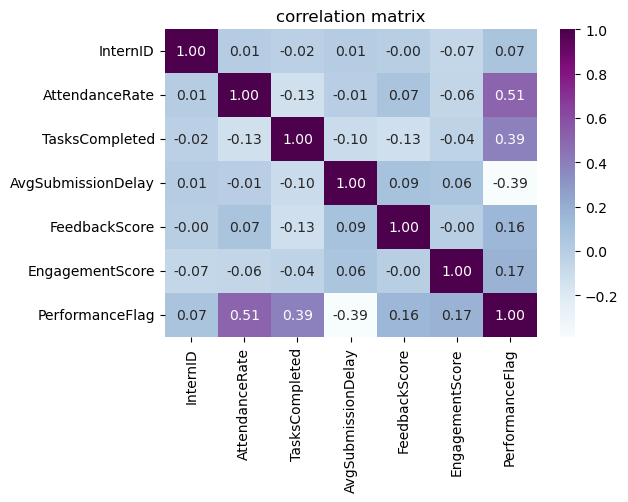

'Attendance and Task Completion are the key features \ninfluencing intern performance, while other variables have minimal effect.'

In [10]:
# Question 2: Are there correlations between features and the target?
plt.figure(figsize=(6,4))
sns.heatmap(data=df.corr(),annot=True,cmap="BuPu",fmt="0.2f")
plt.title("correlation matrix")
plt.show()
"""Attendance and Task Completion are the key features 
influencing intern performance, while other variables have minimal effect."""

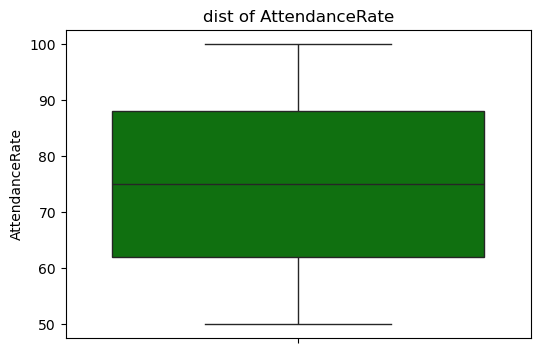

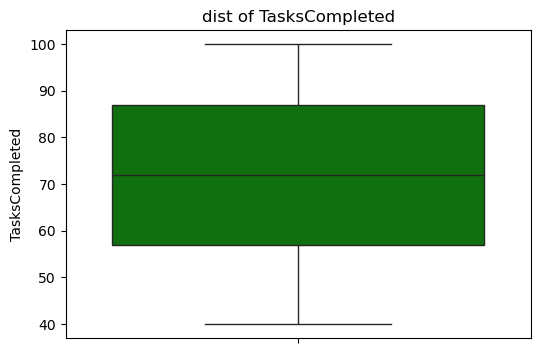

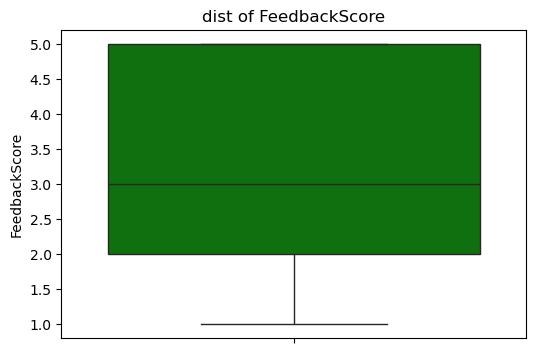

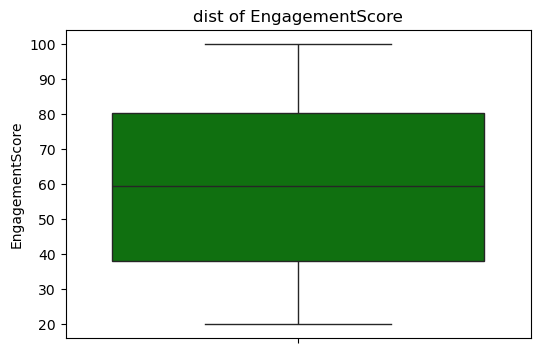

In [19]:
# Q3 Are there outliers in numeric features?
numeric_cols = ['AttendanceRate', 'TasksCompleted', 'FeedbackScore', 'EngagementScore']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df[col],color="green")
    plt.title(f"dist of {col}")
    plt.show()
"""No outliars were found."""

In [26]:
# Data Preprocessing

In [28]:
# Features and target
X = df[['AttendanceRate', 'TasksCompleted', 'FeedbackScore', 'EngagementScore']]
y = df['PerformanceFlag']


In [32]:
# feature scalling for equal weight
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [34]:
# logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialize model
log_model = LogisticRegression(random_state=42)

# Train model
log_model.fit(X_train, y_train)

# Feature coefficients (importance)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)


           Feature  Coefficient
0   AttendanceRate     2.620779
1   TasksCompleted     2.104055
2    FeedbackScore     1.035375
3  EngagementScore     1.032106


In [ ]:
Insights:

AttendanceRate and TasksCompleted are the most influential features.

Feedback and Engagement help, but their effect is smaller.

All coefficients are positive → all features contribute positively to intern success.

Accuracy: 0.825


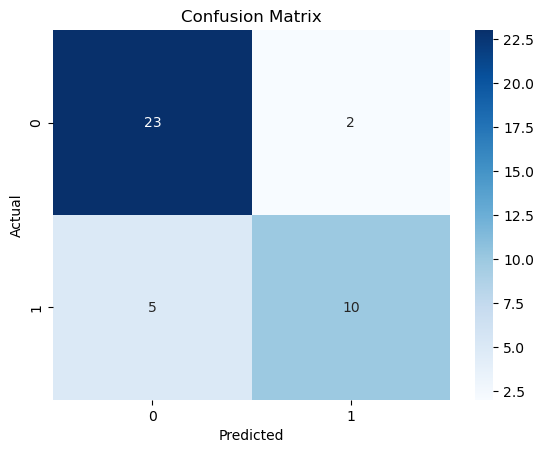

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        25
           1       0.83      0.67      0.74        15

    accuracy                           0.82        40
   macro avg       0.83      0.79      0.80        40
weighted avg       0.83      0.82      0.82        40

ROC-AUC Score: 0.9386666666666668


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test set
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:,1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_score)


In [ ]:
Model Evaluation – Logistic Regression

Accuracy: 0.825 → The model correctly predicts intern performance 82.5% of the time.

Class-wise Performance:

Class	Precision	Recall	F1-score	Interpretation
0 (Fail)	0.82	0.92	0.87	Model is very good at identifying interns who fail.
1 (Success)	0.83	0.67	0.74	Model is moderately good at identifying interns who succeed;
                                    some successful interns are misclassified.
ROC-AUC Score: 0.93 → the model has high discriminative power and can distinguish between interns likely to succeed vs fail.

In [ ]:
Project: Intern Performance Prediction using Machine Learning

Objective: Predict intern performance based on attendance, task completion, feedback, and engagement to guide mentors.

Steps Completed:

Data Import & Cleaning – No missing values, no categorical variables.

Exploratory Data Analysis – Features approximately normally distributed; AttendanceRate and TasksCompleted most correlated with performance.

Preprocessing – Feature scaling applied for numeric features.

Model Training – Logistic Regression trained; AttendanceRate and TasksCompleted most influential.

Model Evaluation – Accuracy 82.5%, ROC-AUC 0.93; confusion matrix and class-wise performance analyzed.

Conclusion:

The model successfully predicts intern performance.

Attendance and task completion are the strongest predictors.

Mentors can use these insights to provide targeted support.